This notebook contains the Twitter data experiment results where we applied standard NCPD to the video tensor. Due to the non-convexity of the NCPD task, results will vary run to run, so the results from this notebook will not exactly match those in the paper.

In [4]:
# loading packages and functions
import torch
import numpy as np
from matplotlib import pyplot as plt

import torch.nn as nn
from torch.autograd import Variable

import sys
sys.path.insert(1,"./src")

from NNCPD import outer_product_np

import tensorly as tl
from tensorly import unfold as tl_unfold
from tensorly.decomposition import parafac, non_negative_parafac

In [6]:
torch.set_default_tensor_type(torch.DoubleTensor)

words = np.load("./data/words_100.npy", allow_pickle=True)
X = np.load("./data/tweets_bag_100.npy", allow_pickle=True)

X = X.reshape((8, 10, -1))

## Rank 4 NCPD

In [8]:
r=4
factors_tl = non_negative_parafac(X, r, init="random", random_state=13)[1]

approx = outer_product_np(factors_tl[0], factors_tl[1], factors_tl[2])

print("Reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X-approx), 2))
print("Relative reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X-approx), 2)  / np.linalg.norm(np.ndarray.flatten(X), 2))
print()

Reconstruction loss: 7.952349009822536
Relative reconstruction loss: 0.8890996483383169



### Rank 4 Keywords

In [9]:
C = factors_tl[2]

keywords = np.empty((7,4), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

for i in range(C.shape[1]):
    col = C[:,i]
    top = col.argsort()
    top = top[-5:][::-1]

    keywords[2:,i] = words[top]

print("")
print("RANK 4 KEYWORDS:")  
print("------------------")

col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(len(row))))


RANK 4 KEYWORDS:
------------------
Topic 1     Topic 2        Topic 3     Topic 4     
-------     -------        -------     -------     
trump       berniesanders  crooked     tedcruz     
hillary     people         hillary     cruz        
johnkasich  bernie         thank       ted         
ohio        must           marcorubio  internet    
kasich      vote           great       choosecruz  


### Rank 4 Factor Matrices

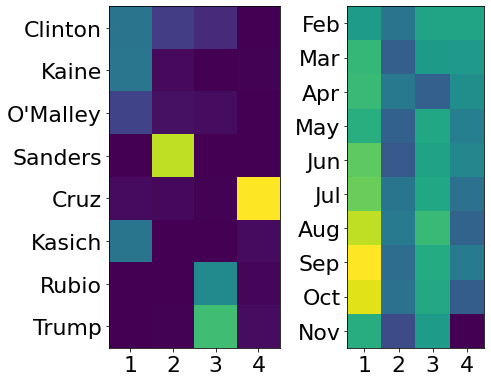

In [10]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(7,5.2))

#color = "binary"
color = "viridis"
plt.sca(axs[0])
plt.yticks(range(8), ['Clinton', 'Kaine', 'O\'Malley', 'Sanders', 'Cruz', 'Kasich', 'Rubio', 'Trump'], fontsize=22)
plt.xticks(range(r), range(1,r+1), fontsize=22)
plt.sca(axs[1])
plt.xticks(range(r), range(1,r+1), fontsize=22)
plt.yticks(range(10), ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], fontsize=22)

axs[0].imshow(factors_tl[0], cmap=plt.get_cmap(color))
axs[1].imshow(factors_tl[1], cmap=plt.get_cmap(color))
plt.show()

## Rank 2 NCPD

In [13]:
r=2
factors_tl = non_negative_parafac(X, r, init="random", random_state=6)[1]

approx = outer_product_np(factors_tl[0], factors_tl[1], factors_tl[2])

print("Reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X-approx), 2))
print("Relative reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X-approx), 2)  / np.linalg.norm(np.ndarray.flatten(X), 2))
print()

Reconstruction loss: 8.216059894201868
Relative reconstruction loss: 0.9185834215322556



### Rank 2 Keywords

In [7]:
C = factors_tl[2]

keywords = np.empty((7,2), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

for i in range(C.shape[1]):
    col = C[:,i]
    top = col.argsort()
    top = top[-5:][::-1]

    keywords[2:,i] = words[top]

print("")
print("RANK 2 KEYWORDS:")  
print("------------------")

col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(len(row))))



RANK 2 KEYWORDS:
------------------
Topic 1  Topic 2     
-------  -------     
trump    tedcruz     
hillary  cruz        
vote     ted         
people   johnkasich  
donald   kasich      


### Rank 2 Factor Matrices

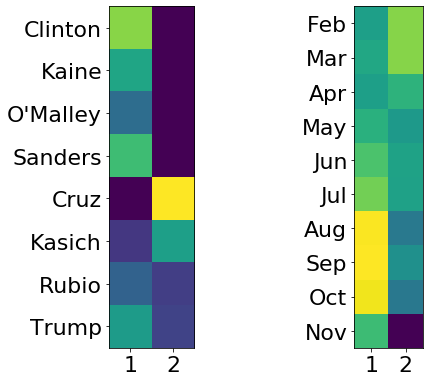

In [8]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(7,5.2))

#color = "binary"
color = "viridis"
plt.sca(axs[0])
plt.yticks(range(8), ['Clinton', 'Kaine', 'O\'Malley', 'Sanders', 'Cruz', 'Kasich', 'Rubio', 'Trump'], fontsize=22)
plt.xticks(range(r), range(1,r+1), fontsize=22)
plt.sca(axs[1])
plt.xticks(range(r), range(1,r+1), fontsize=22)
plt.yticks(range(10), ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], fontsize=22)

axs[0].imshow(factors_tl[0], cmap=plt.get_cmap(color))
axs[1].imshow(factors_tl[1], cmap=plt.get_cmap(color))
plt.show()